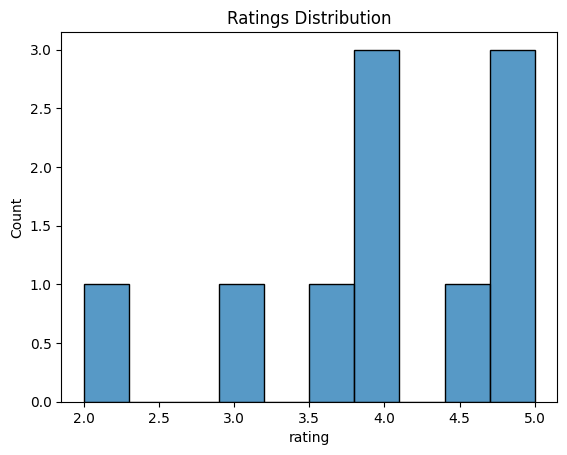

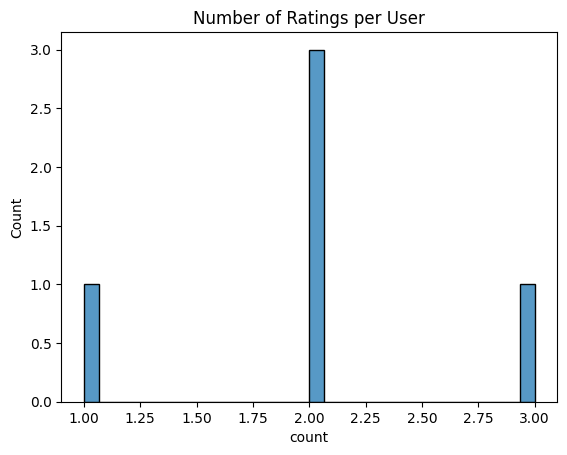

Random Forest RMSE: 1.4160022148260543
Random Forest R²: -2.5645551509196287
KNN RMSE: 1.1423659658795862
KNN R²: -1.3199999999999994


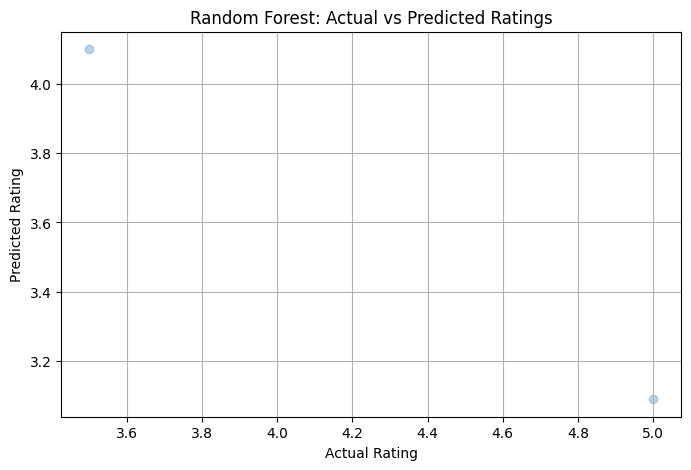

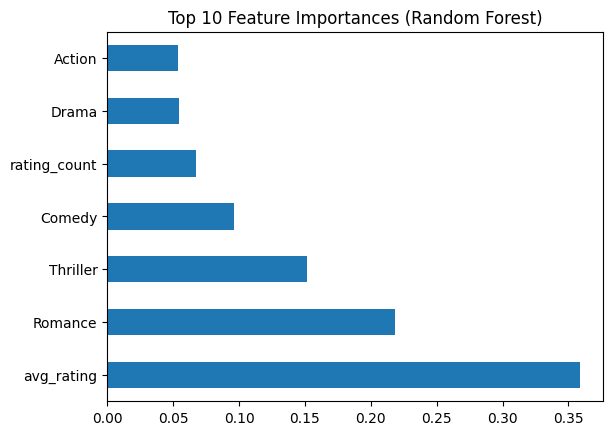

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

ratings.drop_duplicates(inplace=True)
movies.drop_duplicates(inplace=True)
ratings.dropna(inplace=True)
movies.dropna(inplace=True)

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

ratings = ratings[(ratings['rating'] >= 0.5) & (ratings['rating'] <= 5)]

movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
all_genres = set(g for sublist in movies['genres'] for g in sublist)
for genre in all_genres:
    movies[genre] = movies['genres'].apply(lambda x: int(genre in x))

sns.histplot(ratings['rating'], bins=10)
plt.title("Ratings Distribution")
plt.show()

user_rating_counts = ratings['userId'].value_counts()
sns.histplot(user_rating_counts, bins=30)
plt.title("Number of Ratings per User")
plt.show()

movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']
movies = movies.merge(movie_stats, on='movieId', how='left')
movies.fillna(0, inplace=True)

movies.drop(['genres'], axis=1, inplace=True)

data = ratings.merge(movies, on='movieId')

features = data.drop(columns=['userId', 'movieId', 'title', 'timestamp', 'rating'])
target = data['rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)

rf.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

rf_preds = rf.predict(X_test_scaled)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R²:", r2_score(y_test, rf_preds))

knn_preds = knn.predict(X_test_scaled)
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, knn_preds)))
print("KNN R²:", r2_score(y_test, knn_preds))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_preds, alpha=0.3)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Random Forest: Actual vs Predicted Ratings")
plt.grid()
plt.show()

importances = pd.Series(rf.feature_importances_, index=features.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


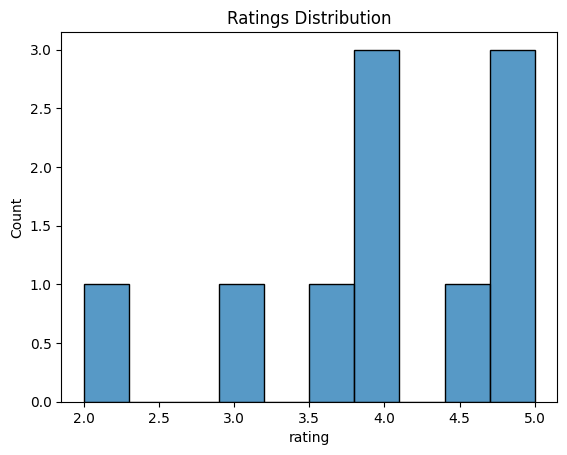

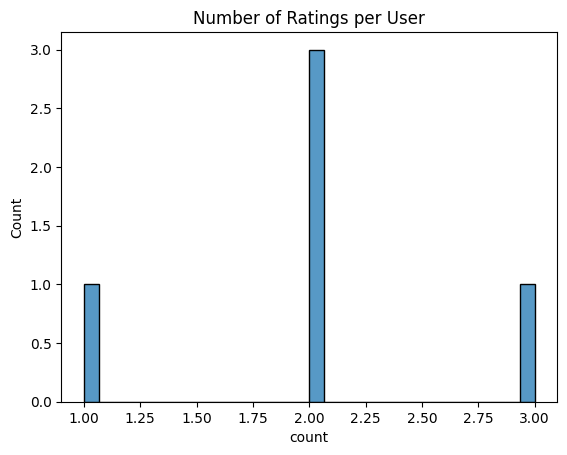

=== Random Forest Metrics ===
RMSE: 1.4160022148260543
MAE: 1.2552976190476193
R²: -2.5645551509196287

=== KNN Metrics ===
RMSE: 1.1423659658795862
MAE: 1.0499999999999998
R²: -1.3199999999999994


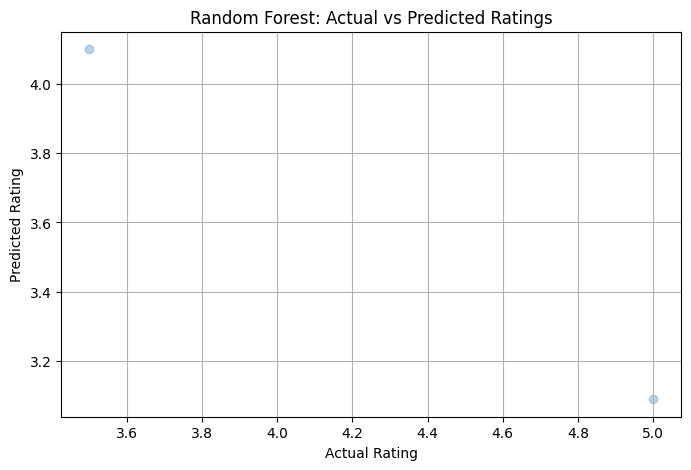

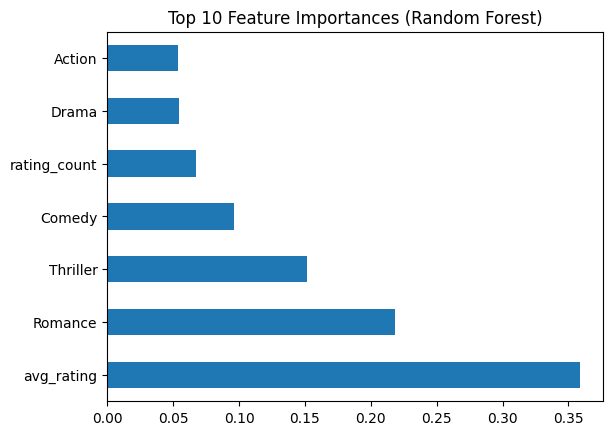

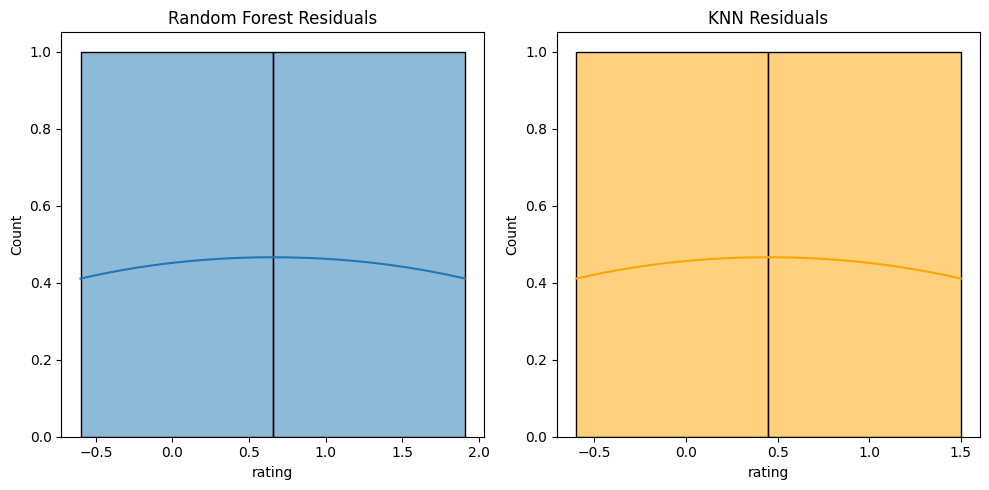


Model Comparison Table:
            Model      RMSE       MAE        R²
0  Random Forest  1.416002  1.255298 -2.564555
1            KNN  1.142366  1.050000 -1.320000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Load Data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Clean Data
ratings.drop_duplicates(inplace=True)
movies.drop_duplicates(inplace=True)
ratings.dropna(inplace=True)
movies.dropna(inplace=True)
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings = ratings[(ratings['rating'] >= 0.5) & (ratings['rating'] <= 5)]

# Genre Encoding
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
all_genres = set(g for sublist in movies['genres'] for g in sublist)
for genre in all_genres:
    movies[genre] = movies['genres'].apply(lambda x: int(genre in x))

# Visualize Ratings Distribution
sns.histplot(ratings['rating'], bins=10)
plt.title("Ratings Distribution")
plt.show()

# Visualize User Rating Frequency
user_rating_counts = ratings['userId'].value_counts()
sns.histplot(user_rating_counts, bins=30)
plt.title("Number of Ratings per User")
plt.show()

# Movie Stats
movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']
movies = movies.merge(movie_stats, on='movieId', how='left')
movies.fillna(0, inplace=True)
movies.drop(['genres'], axis=1, inplace=True)

# Merge Ratings with Movie Features
data = ratings.merge(movies, on='movieId')

# Feature Selection
features = data.drop(columns=['userId', 'movieId', 'title', 'timestamp', 'rating'])
target = data['rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)

rf.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# Predictions
rf_preds = rf.predict(X_test_scaled)
knn_preds = knn.predict(X_test_scaled)

# Evaluation Metrics
print("=== Random Forest Metrics ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("R²:", r2_score(y_test, rf_preds))

print("\n=== KNN Metrics ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_preds)))
print("MAE:", mean_absolute_error(y_test, knn_preds))
print("R²:", r2_score(y_test, knn_preds))

# Actual vs Predicted Plot (RF)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_preds, alpha=0.3)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Random Forest: Actual vs Predicted Ratings")
plt.grid()
plt.savefig("rf_actual_vs_predicted.png")
plt.show()

# Feature Importance (RF)
importances = pd.Series(rf.feature_importances_, index=features.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.savefig("rf_feature_importance.png")
plt.show()

# Residual Plots
rf_residuals = y_test - rf_preds
knn_residuals = y_test - knn_preds

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(rf_residuals, kde=True)
plt.title("Random Forest Residuals")

plt.subplot(1, 2, 2)
sns.histplot(knn_residuals, kde=True, color='orange')
plt.title("KNN Residuals")
plt.tight_layout()
plt.savefig("residuals_rf_knn.png")
plt.show()

# Model Comparison Table
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, rf_preds)),
             np.sqrt(mean_squared_error(y_test, knn_preds))],
    'MAE': [mean_absolute_error(y_test, rf_preds),
            mean_absolute_error(y_test, knn_preds)],
    'R²': [r2_score(y_test, rf_preds),
           r2_score(y_test, knn_preds)]
})

print("\nModel Comparison Table:\n", results)
results.to_csv("model_comparison.csv", index=False)

import joblib

# Save model and scaler
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

from google.colab import files
files.download('rf_model.pkl')
files.download('scaler.pkl')

